# **Infraestructura durante la gestión de Héctor Gay - CIUDAD DE BAHÍA BLANCA**


Obras públicas ejecutadas y en ejecución a partir del año 2016.

Visitar: https://obras.bahia.gob.ar/

Frecuencia de actualización: Diario

¿Que se quiere lograr?

Tratar de establecer:
- Cuántas obras de infraestructura se hicieron durante la gestión de Héctor Gay.

- Si hubo una distribucion desigual de obras en los diferentes barrios. Una de las criticas mas importantes, que no se hacen obras en la periferia.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_json('https://gobiernoabierto.bahia.gob.ar/WS/4022')

In [4]:
df.columns

Index(['id', 'nombre', 'tipo', 'jurisdiccion', 'licitacion_oferta_empresa',
       'monto_contrato', 'etapa', 'porcentaje_avance', 'plazo_meses',
       'expediente_numero', 'calle', 'altura', 'lat', 'lng'],
      dtype='object')

## DESCRIPCIÓN GENERAL Y ESTADÍSTICAS DEL DATASET


Primero:
Se hacen las estadísticas generales de rigor que describen el conjunto de datos.

Segundo:
Se podria hacer un análisis rápido de:
- cantidad por TIPO DE OBRA
- cantidad por JURISDICCION (Delegación)
- Estadísticas de Montos de contratos
- Estadísticas de empresas
- Estadísticas de etapas
- Estadísticas de plazos

In [6]:
df.head(2)

,id,nombre,tipo,jurisdiccion,licitacion_oferta_empresa,monto_contrato,etapa,porcentaje_avance,plazo_meses,expediente_numero,calle,altura,lat,lng
0,2,PAVIMENTACION CALLE PARERA E/ PILMAIQUEN Y LOS...,Infraestructura,Las Villas,INGENIERIA Y ARQUITECTURA SRL,26817139.7,Finalizada,100,7,417R-3962/18,Parera 2200 -3500,,-38.718015,-62.226323
1,3,CONSTRUCCION INSTITUTO SUPERIOR EDUCACION FISI...,Instituciones Educativas y Sociales,Centro,PROBRAS BAHIA SA,22383682.0,Finalizada,100,12,416R-5844/16,Agustin de Arrieta,1255,-38.719556,-62.240423


In [7]:
df.shape

(1118, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1118 non-null   int64  
 1   nombre                     1118 non-null   object 
 2   tipo                       1118 non-null   object 
 3   jurisdiccion               1094 non-null   object 
 4   licitacion_oferta_empresa  1085 non-null   object 
 5   monto_contrato             1118 non-null   float64
 6   etapa                      1118 non-null   object 
 7   porcentaje_avance          1118 non-null   int64  
 8   plazo_meses                1118 non-null   int64  
 9   expediente_numero          1105 non-null   object 
 10  calle                      1089 non-null   object 
 11  altura                     1118 non-null   object 
 12  lat                        1118 non-null   float64
 13  lng                        1118 non-null   float

In [9]:
#Check missing values
df.isna().sum()

id                            0
nombre                        0
tipo                          0
jurisdiccion                 24
licitacion_oferta_empresa    33
monto_contrato                0
etapa                         0
porcentaje_avance             0
plazo_meses                   0
expediente_numero            13
calle                        29
altura                        0
lat                           0
lng                           0
dtype: int64

In [10]:
# Check null values
df.isnull().sum()

id                            0
nombre                        0
tipo                          0
jurisdiccion                 24
licitacion_oferta_empresa    33
monto_contrato                0
etapa                         0
porcentaje_avance             0
plazo_meses                   0
expediente_numero            13
calle                        29
altura                        0
lat                           0
lng                           0
dtype: int64

In [11]:
#-------------------------------------------------------
#-------------------------------------------------------

El dataset contiene **14 columnas y 1118 filas**

- Las columnas "*jurisdiccion*", "*licitacion_oferta_empresa*", "*expediente_numero*", "*calle*" contienen valores nulos. Es decir, **hay faltante de datos.**

Habría que ver si el contenido de esas columnas es importante para el análisis.

### Problemas con los que me encuentro:
- **No existe una columna de fecha o año** como para hacer una comparativa de cuántas obras se hicieron por año, por ejemplo. Lo que sí hay es una columna de "expediente_numero" y **quizás se pueda extraer alguna referencia al año ya que terminan con "/17", "/18", "/19" que hace referencia al año del expediente**.

- **Los TIPOS DE OBRAS se estructuraron en 5 tipos diferentes**. Eso me complica al momento de buscar obras especifícas sobre pavimentación, por ejemplo. No existe segmentación por obras. Por lo tanto, voy a tener que rebuscármelas para solucionar ese inconveniente.

In [12]:
#-------------------------------------------------------
#-------------------------------------------------------

### CANTIDAD POR TIPO DE OBRA

El conjunto de datos está estructurado, en cuanto a TIPOS DE OBRA se refiere, en cinco diferentes obras. La idea es poder ver a simple vista **qué tipo de obras ha predominado durante la gestión de Héctor Gay**.

> Bloque con sangría



Tipos de obra:
- **INFRAESTRUCTURA**: Comprende obras e intervenciones relacionadas con desagües cloacales y pluviales, obras de equipamiento, redes sanitarias, de gas y electricidad, cordón cuneta, asfalto y puentes.
- **INSTITUCIONES EDUCATIVAS Y SOCIALES**: Obras de construcción, refacción o puesta en valor de establecimientos educativos y de carácter social.
- **VIVIENDA**: Construcción de viviendas nuevas y obras de mejoras ejecutadas en viviendas existentes.
- **ARQUITECTURA**: Obras civiles de reforma, puesta en valor o construcción de edificios.
- **ESPACIO PÚBLICO**: Obras e intervenciones en el espacio público, tales como obras en plazas y parques, en veredas o de regeneración urbana.
- **SALUD**: Obras de construcción, remodelación y puesta en valor en hospitales y centros de salud y de atención comunitaria.

In [13]:
#CANTIDAD TOTAL DE OBRAS
total_obras = df['tipo'].value_counts()
total_obras.sum()

1118

In [16]:
#CANTIDAD DE OBRAS POR "TIPO DE OBRA"
df['tipo'].value_counts()

Infraestructura                        696
Instituciones Educativas y Sociales    207
Vivienda                                89
Arquitectura                            63
Espacio Público                         36
Salud                                   27
Name: tipo, dtype: int64

In [17]:
#CANTIDAD DE OBRAS POR "TIPO DE OBRA" EN PORCENTAJE
df['tipo'].value_counts(normalize=True) * 100 #porcentaje

Infraestructura                        62.254025
Instituciones Educativas y Sociales    18.515206
Vivienda                                7.960644
Arquitectura                            5.635063
Espacio Público                         3.220036
Salud                                   2.415027
Name: tipo, dtype: float64

Text(0.5, 1.0, 'Distribución por TIPO DE OBRAS')

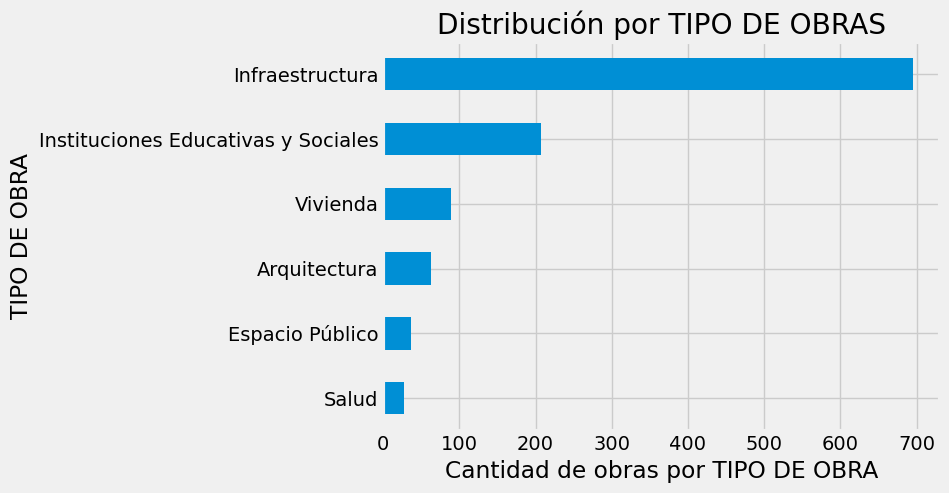

In [19]:
#VISUALIZACIÓN: Distribución por TIPO de obras públicas en Bahía Blanca

df['tipo'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('Cantidad de obras por TIPO DE OBRA')
plt.ylabel('TIPO DE OBRA')
plt.title('Distribución por TIPO DE OBRAS')

Se puede notar claramente que **durante la gestión de Héctor Gay el tipo de obras que más se ejecutaron fueron las de INFRAESTRUCTURA**.

Ahora bien, sería importante conocer los **tipos de obras** dentro de la categoría Infraestructura.

Acá se da uno de los problemas que marqué en un inicio: **no están segmentadas las obras dentro de cada categoría**.

Por lo tanto, habrá que rebuscárselas. ☹

In [20]:
#listado total de obras para ver si hay algún patrón como para buscar por término

#df.nombre.unique() 

In [22]:
 pavimento  = df[df.nombre.str.contains('PAVIMENTACI' , case=False)] #filtrar la palabra "pavimentaci" SIN distinguir entre mayúsculas y minúsculas

In [28]:
pavimento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 1035
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         166 non-null    int64  
 1   nombre                     166 non-null    object 
 2   tipo                       166 non-null    object 
 3   jurisdiccion               162 non-null    object 
 4   licitacion_oferta_empresa  166 non-null    object 
 5   monto_contrato             166 non-null    float64
 6   etapa                      166 non-null    object 
 7   porcentaje_avance          166 non-null    int64  
 8   plazo_meses                166 non-null    int64  
 9   expediente_numero          165 non-null    object 
 10  calle                      162 non-null    object 
 11  altura                     166 non-null    object 
 12  lat                        166 non-null    float64
 13  lng                        166 non-null    float6

In [38]:
#Hay 166 obras de pavimentacion lo que NO significa que se hayan hecho 166 cuadras de pavimento.

In [48]:
asfalto  = df[df.nombre.str.contains('asfalt' , case=False)]

In [51]:
asfalto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 8 to 567
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         69 non-null     int64  
 1   nombre                     69 non-null     object 
 2   tipo                       69 non-null     object 
 3   jurisdiccion               69 non-null     object 
 4   licitacion_oferta_empresa  69 non-null     object 
 5   monto_contrato             69 non-null     float64
 6   etapa                      69 non-null     object 
 7   porcentaje_avance          69 non-null     int64  
 8   plazo_meses                69 non-null     int64  
 9   expediente_numero          69 non-null     object 
 10  calle                      69 non-null     object 
 11  altura                     69 non-null     object 
 12  lat                        69 non-null     float64
 13  lng                        69 non-null     float64


In [52]:
#69 obras de reencarpetado asfaltico

In [53]:
cuneta  = df[df.nombre.str.contains('cunet' , case=False)]

In [55]:
cuneta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 5 to 1051
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         65 non-null     int64  
 1   nombre                     65 non-null     object 
 2   tipo                       65 non-null     object 
 3   jurisdiccion               63 non-null     object 
 4   licitacion_oferta_empresa  61 non-null     object 
 5   monto_contrato             65 non-null     float64
 6   etapa                      65 non-null     object 
 7   porcentaje_avance          65 non-null     int64  
 8   plazo_meses                65 non-null     int64  
 9   expediente_numero          64 non-null     object 
 10  calle                      56 non-null     object 
 11  altura                     65 non-null     object 
 12  lat                        65 non-null     float64
 13  lng                        65 non-null     float64

In [56]:
#65 obras de cordon cuneta

In [41]:
#OBRAS DE GAS
gas = df[df.nombre.str.contains('gas' , case=False)]

In [42]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 38 to 1111
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         131 non-null    int64  
 1   nombre                     131 non-null    object 
 2   tipo                       131 non-null    object 
 3   jurisdiccion               130 non-null    object 
 4   licitacion_oferta_empresa  127 non-null    object 
 5   monto_contrato             131 non-null    float64
 6   etapa                      131 non-null    object 
 7   porcentaje_avance          131 non-null    int64  
 8   plazo_meses                131 non-null    int64  
 9   expediente_numero          129 non-null    object 
 10  calle                      131 non-null    object 
 11  altura                     131 non-null    object 
 12  lat                        131 non-null    float64
 13  lng                        131 non-null    float

In [43]:
#Hay 131 obras de gas

In [44]:
 cloacas = df[df.nombre.str.contains('cloac' , case=False)]

In [45]:
cloacas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 7 to 1045
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         113 non-null    int64  
 1   nombre                     113 non-null    object 
 2   tipo                       113 non-null    object 
 3   jurisdiccion               110 non-null    object 
 4   licitacion_oferta_empresa  113 non-null    object 
 5   monto_contrato             113 non-null    float64
 6   etapa                      113 non-null    object 
 7   porcentaje_avance          113 non-null    int64  
 8   plazo_meses                113 non-null    int64  
 9   expediente_numero          113 non-null    object 
 10  calle                      109 non-null    object 
 11  altura                     113 non-null    object 
 12  lat                        113 non-null    float64
 13  lng                        113 non-null    float6

In [47]:
#Hay 113 obras de cloacas

In [57]:
pluviales = df[df.nombre.str.contains('pluvi' , case=False)]

In [58]:
pluviales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 33 to 1072
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16 non-null     int64  
 1   nombre                     16 non-null     object 
 2   tipo                       16 non-null     object 
 3   jurisdiccion               16 non-null     object 
 4   licitacion_oferta_empresa  16 non-null     object 
 5   monto_contrato             16 non-null     float64
 6   etapa                      16 non-null     object 
 7   porcentaje_avance          16 non-null     int64  
 8   plazo_meses                16 non-null     int64  
 9   expediente_numero          16 non-null     object 
 10  calle                      15 non-null     object 
 11  altura                     16 non-null     object 
 12  lat                        16 non-null     float64
 13  lng                        16 non-null     float6

In [59]:
#16 obras de desagues pluviales

In [62]:
potable = df[df.nombre.str.contains('potable' , case=False)]

In [64]:
potable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 34 to 1039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         30 non-null     int64  
 1   nombre                     30 non-null     object 
 2   tipo                       30 non-null     object 
 3   jurisdiccion               30 non-null     object 
 4   licitacion_oferta_empresa  29 non-null     object 
 5   monto_contrato             30 non-null     float64
 6   etapa                      30 non-null     object 
 7   porcentaje_avance          30 non-null     int64  
 8   plazo_meses                30 non-null     int64  
 9   expediente_numero          30 non-null     object 
 10  calle                      27 non-null     object 
 11  altura                     30 non-null     object 
 12  lat                        30 non-null     float64
 13  lng                        30 non-null     float6

In [65]:
#30 obras de extension de agua potable

## Obra pública por Delegaciones Municipales -jurisidicción en el dataset-

Voy a ver cuántas obras se han realizado por delegación para ver si hay alguna preferencia por alguna/s de ella/s

In [66]:
df['jurisdiccion'].value_counts()

Centro                  280
Villa Harding Green     223
Las Villas              153
Norte                   124
Villa Rosas             112
Noroeste                103
Ingeniero White          35
General Daniel Cerri     31
Sesquicentenario         18
Cabildo                  15
Name: jurisdiccion, dtype: int64

In [67]:
df['jurisdiccion'].value_counts(normalize=True) * 100 #porcentaje

Centro                  25.594150
Villa Harding Green     20.383912
Las Villas              13.985375
Norte                   11.334552
Villa Rosas             10.237660
Noroeste                 9.414991
Ingeniero White          3.199269
General Daniel Cerri     2.833638
Sesquicentenario         1.645338
Cabildo                  1.371115
Name: jurisdiccion, dtype: float64

Text(0.5, 1.0, 'Distribución de obras por delegaciones')

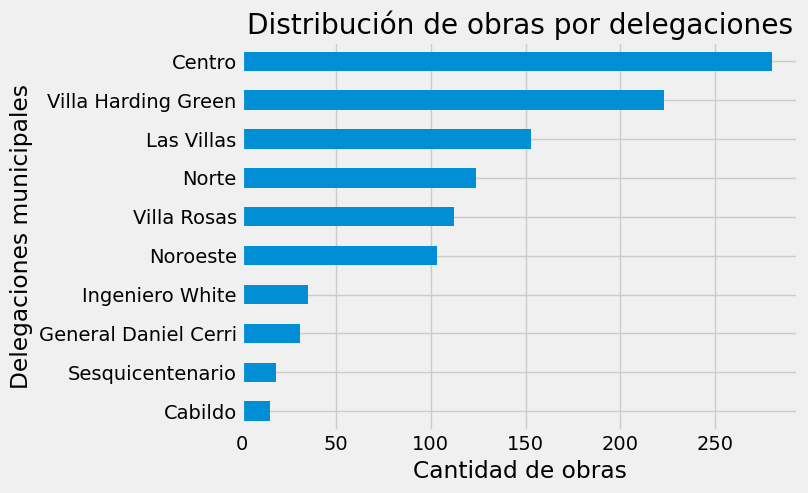

In [68]:
df['jurisdiccion'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('Cantidad de obras')
plt.ylabel('Delegaciones municipales')
plt.title('Distribución de obras por delegaciones')

A simple vista, con esta visualización, se podría decir que la delegación Centro ha sido la más favorecida con obras públicas por parte de la gestión de Héctor Gay.

Pero hay que hacer una aclaración importante porque es uno de los cuestionamientos clave "hacen todo en el centro".

Que se hayan hecho más obras en la Delegación Centro no necesariamente implica que todas son en el micro y macrocentro. Hay delegaciones -como la Delegación Centro- que abarcan demasiados barrios que van más allá del microcentro.

Eso habla más de la obsoleta división en Delegaciones Municipales que debería agiornarse a las necesidades actuales o desaparecer.

No puede ser que la obra de Tres Sargentos (*'PAVIMENTACION CALLE TRES SARGENTOS E/ PILMAIQUEN Y FRAGATA SARMIENTO. CHARCAS E/SARMIENTO Y FORTALEZA PROTECTORA ARGENTINA. SAN LORENZO E/ NECOCHEA Y MISIONEROS ( 21 CUADRAS)  (417R-200/17)*') sea considerada en el Centro, por ejemplo.

In [69]:
#Discriminar por TIPO de obras dentro de cada JURISDICCION (Delegación)
delegaciones = df.groupby(['jurisdiccion'])
delegaciones['tipo'].value_counts()

jurisdiccion          tipo                               
Cabildo               Infraestructura                          8
                      Instituciones Educativas y Sociales      4
                      Arquitectura                             2
                      Salud                                    1
Centro                Infraestructura                        146
                      Instituciones Educativas y Sociales     72
                      Arquitectura                            42
                      Espacio Público                         11
                      Salud                                    9
General Daniel Cerri  Infraestructura                         15
                      Instituciones Educativas y Sociales     12
                      Salud                                    2
                      Arquitectura                             1
                      Espacio Público                          1
Ingeniero White       Infraestru

In [70]:
delegaciones['tipo'].value_counts(normalize=True) * 100

jurisdiccion          tipo                               
Cabildo               Infraestructura                        53.333333
                      Instituciones Educativas y Sociales    26.666667
                      Arquitectura                           13.333333
                      Salud                                   6.666667
Centro                Infraestructura                        52.142857
                      Instituciones Educativas y Sociales    25.714286
                      Arquitectura                           15.000000
                      Espacio Público                         3.928571
                      Salud                                   3.214286
General Daniel Cerri  Infraestructura                        48.387097
                      Instituciones Educativas y Sociales    38.709677
                      Salud                                   6.451613
                      Arquitectura                            3.225806
                   

### Estadísticas sobre los contratos y las empresas

In [71]:
df['licitacion_oferta_empresa'].value_counts().head(15)

CONSAR                           85
GEOMAC                           50
RIMSOL SA                        48
OBRAS ABEDUL                     45
COINCE SA                        36
CERRA Y MORO SRL                 30
ELECTROMECANICA RI INSUA         30
LASCO CONSTRUCCIONES             29
INGENIERIA Y ARQUITECTURA SRL    27
CERRA Y MORO                     27
SCHLOSSER INGENIERIA             22
CARRETERAS 2000 SA               22
CARCERENY CONST. SA              20
COINCE                           20
ECOAR                            19
Name: licitacion_oferta_empresa, dtype: int64

Text(0.5, 1.0, 'TOP 15 - Empresas que realizaron obras durante la gestión de Hector Gay')

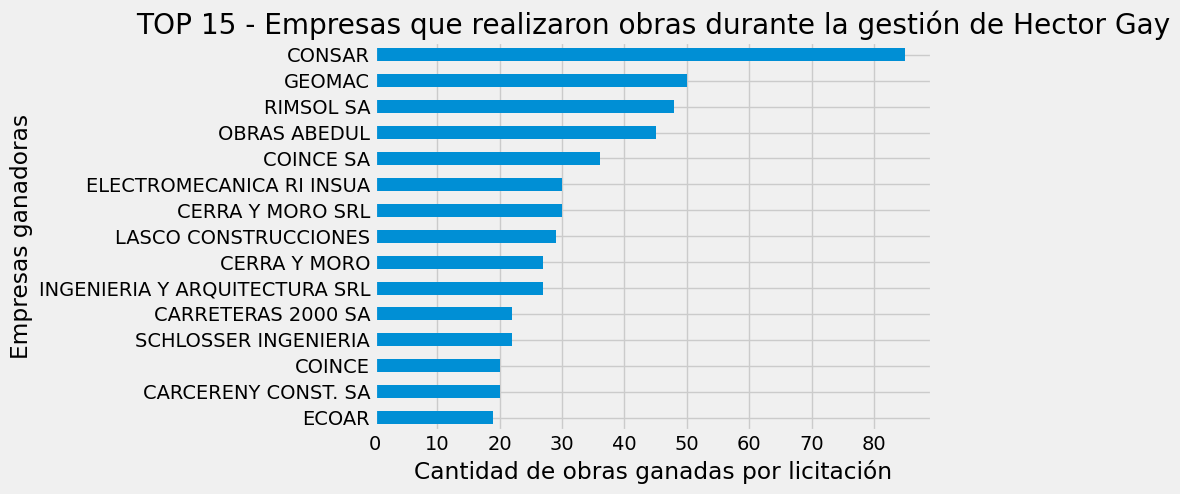

In [72]:
df['licitacion_oferta_empresa'].value_counts().head(15).sort_values().plot(kind='barh')

plt.xlabel('Cantidad de obras ganadas por licitación')
plt.ylabel('Empresas ganadoras')
plt.title('TOP 15 - Empresas que realizaron obras durante la gestión de Hector Gay')

In [73]:
df['etapa'].value_counts()

Finalizada      917
En ejecucion    160
En proyecto      41
Name: etapa, dtype: int64

In [76]:
#La columna MONTO DE CONTRATOS tiene valor errones o desactualizados, por lo tanto no sirve a los fines de ningun analisis posible